# Assess the behavioral performance (compositionally) of ANNs with different training schemes

#### Compare practiced v. 2-rule overlap v. 1-rule overlap accuracy performances

# 2/4/2021

In [1]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from importlib import reload
import tools
import pandas as pd

datadir = '../../data/model_results/experiment8/'

In [2]:
df_nopretraining = {}
df_nopretraining['Accuracy'] = []
df_nopretraining['Condition'] = []
df_nopretraining['Simulation'] = []
df_2rulepretrain = {}
df_2rulepretrain['Accuracy'] = []
df_2rulepretrain['Condition'] = []
df_2rulepretrain['Simulation'] = []
df_1rulepretrain = {}
df_1rulepretrain['Accuracy'] = []
df_1rulepretrain['Condition'] = []
df_1rulepretrain['Simulation'] = []

nsimulations=40
for sim in range(0,nsimulations):
    #
    ### Organize no pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_practice_PerTaskData' + str(sim) + '.csv')
#     df = pd.read_csv(datadir + 'expt7_adam_200epochs_2layers_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_nopretraining['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_nopretraining['Accuracy'].append(np.mean(overlap2)*100)
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('2-rule')
    #
    df_nopretraining['Accuracy'].append(np.mean(overlap1)*100)
    df_nopretraining['Simulation'].append(sim)
    df_nopretraining['Condition'].append('1-rule')
    
    #####################################
    ### Organize 2-rule pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_2rulepretraining_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_2rulepretrain['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_2rulepretrain['Simulation'].append(sim)
    df_2rulepretrain['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_2rulepretrain['Accuracy'].append(np.mean(overlap2)*100)
    df_2rulepretrain['Simulation'].append(i)
    df_2rulepretrain['Condition'].append('2-rule')
    #
    df_2rulepretrain['Accuracy'].append(np.mean(overlap1)*100)
    df_2rulepretrain['Simulation'].append(i)
    df_2rulepretrain['Condition'].append('1-rule')
    
    #####################################
    ### Organize 1-rule pretraining model data
    df = pd.read_csv(datadir + 'expt8_adam_90accCutOff_2layers_pretraining_practice_PerTaskData' + str(sim) + '.csv')
    tmp = df.loc[df.NumPracticedTasks==4]
    practiced_tasks = tmp.loc[tmp.Condition=='Practiced']
    novel_tasks = tmp.loc[tmp.Condition=='Novel']
    #
    df_1rulepretrain['Accuracy'].append(np.mean(practiced_tasks.Accuracy.values*100))
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('Practiced')
    #
    overlap2 = []
    overlap1 = []
    for i in novel_tasks.index:
        tmpnov = novel_tasks.loc[i]
        rule_sim = []
        for j in practiced_tasks.index:
            tmpprac = practiced_tasks.loc[j]
            rule_sim.append(int(tmpprac.Logic==tmpnov.Logic) + int(tmpprac.Sensory==tmpnov.Sensory) + int(tmpprac.Motor==tmpnov.Motor))
        if np.max(rule_sim)==2:
            overlap2.append(tmpnov.Accuracy)
        elif np.max(rule_sim)==1:
            overlap1.append(tmpnov.Accuracy)
        else:
            raise Exception('error')

    df_1rulepretrain['Accuracy'].append(np.mean(overlap2)*100)
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('2-rule')
    #
    df_1rulepretrain['Accuracy'].append(np.mean(overlap1)*100)
    df_1rulepretrain['Simulation'].append(sim)
    df_1rulepretrain['Condition'].append('1-rule')
       
    
df_nopretraining = pd.DataFrame(df_nopretraining)
df_1rulepretrain = pd.DataFrame(df_1rulepretrain)
df_2rulepretrain = pd.DataFrame(df_2rulepretrain)

In [20]:
df_nopretraining.Accuracy[df_nopretraining.Condition=='Practiced'].values


array([94.04296875, 93.9453125 , 95.5078125 , 94.04296875, 95.3125    ,
       93.75      , 93.75      , 95.01953125, 96.484375  , 93.75      ,
       96.58203125, 93.75      , 93.75      , 93.9453125 , 93.75      ,
       94.82421875, 93.75      , 94.43359375, 93.84765625, 94.23828125,
       93.75      , 93.75      , 94.7265625 , 95.5078125 , 95.3125    ,
       93.75      , 93.84765625, 95.41015625, 93.75      , 95.80078125,
       93.75      , 94.43359375, 94.62890625, 94.04296875, 93.75      ,
       94.3359375 , 93.75      , 93.84765625, 94.140625  , 94.140625  ])

In [21]:
df_nopretraining.Accuracy[df_nopretraining.Condition=='2-rule'].values


array([33.15972222, 32.45442708, 32.48697917, 32.21571181, 33.34418403,
       33.66970486, 32.75824653, 33.26822917, 33.01866319, 33.59375   ,
       34.50520833, 34.22309028, 31.92274306, 31.99869792, 32.05295139,
       30.94618056, 32.49782986, 31.80338542, 32.96440972, 33.0078125 ,
       34.47265625, 34.73307292, 33.65885417, 30.13237847, 31.71657986,
       30.54470486, 35.44921875, 33.10546875, 32.51953125, 34.72222222,
       31.42361111, 32.56293403, 33.91927083, 33.14887153, 33.203125  ,
       30.859375  , 32.19401042, 32.95355903, 33.13802083, 33.50694444])

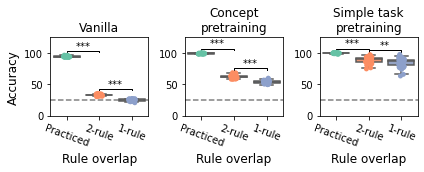

In [32]:
# sns.boxplot(df_compositionalbehav,x="Condition",y="Accuracy")
plt.figure(figsize=(6,2.5))

###############
plt.subplot(131)
plt.title('Vanilla',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_nopretraining,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_nopretraining,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
#
#### Statistical tests - Prac v 2-rule
t, p = stats.ttest_ind(df_nopretraining.Accuracy[df_nopretraining.Condition=='Practiced'].values,
                       df_nopretraining.Accuracy[df_nopretraining.Condition=='2-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_nopretraining.Accuracy[df_nopretraining.Condition=='Practiced'].max() + 5, 2, 'k'
plt.plot([x_prac, x_prac, x_2rule, x_2rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_prac+x_2rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
#### Statistical tests - 2-rule v Prac
t, p = stats.ttest_ind(df_nopretraining.Accuracy[df_nopretraining.Condition=='2-rule'].values,
                       df_nopretraining.Accuracy[df_nopretraining.Condition=='1-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_nopretraining.Accuracy[df_nopretraining.Condition=='2-rule'].values.max() + 5, 2, 'k'
plt.plot([x_2rule, x_2rule, x_1rule, x_1rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_2rule+x_1rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,125)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Rule overlap', fontsize=12)

###############
plt.subplot(132)
plt.title('Concept\npretraining',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_1rulepretrain,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_1rulepretrain,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
#
#### Statistical tests - Prac v 2-rule
t, p = stats.ttest_ind(df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='Practiced'].values,
                       df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='2-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='Practiced'].max() + 5, 2, 'k'
plt.plot([x_prac, x_prac, x_2rule, x_2rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_prac+x_2rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
#### Statistical tests - 2-rule v Prac
t, p = stats.ttest_ind(df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='2-rule'].values,
                       df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='1-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_1rulepretrain.Accuracy[df_1rulepretrain.Condition=='2-rule'].values.max() + 5, 2, 'k'
plt.plot([x_2rule, x_2rule, x_1rule, x_1rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_2rule+x_1rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,125)
plt.ylabel(None)
plt.xlabel('Rule overlap', fontsize=12)

###############
plt.subplot(133)
plt.title('Simple task\npretraining',fontsize=12)
ax = sns.boxplot(x="Condition",y="Accuracy",data=df_2rulepretrain,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="Set2")
ax = sns.stripplot(x="Condition",y="Accuracy",data=df_2rulepretrain,
              dodge=True,palette="Set2")
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--')
#
#### Statistical tests - Prac v 2-rule
t, p = stats.ttest_ind(df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='Practiced'].values,
                       df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='2-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='Practiced'].max() + 5, 2, 'k'
plt.plot([x_prac, x_prac, x_2rule, x_2rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_prac+x_2rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
#### Statistical tests - 2-rule v Prac
t, p = stats.ttest_ind(df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='2-rule'].values,
                       df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='1-rule'].values)
if t>0 and p<0.05: annote="*"
if t>0 and p<0.01: annote="**"
if t>0 and p<0.0001: annote="***"
# Statistical annotations
x_prac, x_2rule, x_1rule = 0, 1, 2
y1, h, col = df_2rulepretrain.Accuracy[df_2rulepretrain.Condition=='2-rule'].values.max() + 5, 2, 'k'
plt.plot([x_2rule, x_2rule, x_1rule, x_1rule], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text((x_2rule+x_1rule)*.5, y1+h, annote, ha='center', va='bottom', color=col)
#
plt.xticks(rotation=-20,fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,125)
plt.ylabel(None)
plt.xlabel('Rule overlap', fontsize=12)
plt.tight_layout()
plt.savefig('ANN_BehavioralPerformanceCompositional.png',dpi=300)